In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeClassifier
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

samples = 2428
seed = 244828
times = 100

# samples = 2481
# seed = 244881

X, Y  = datasets.make_classification(n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=seed, n_samples=samples)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=seed)

# print(X_test)
# print(Y_test)

In [2]:
def normalize(matrix):
    return (matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))

# X_train = normalize(X_train)
# Y_train = normalize(Y_train)
# X_test = normalize(X_test)
# Y_test = normalize(Y_test)

# print(X_test)
# print(Y_test)

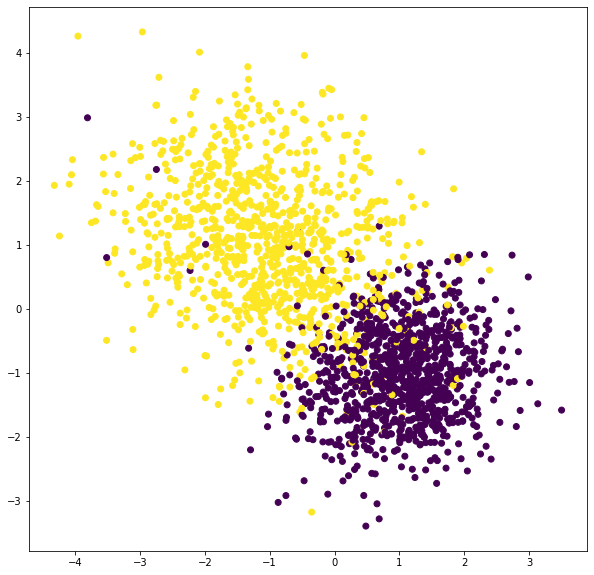

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)

### Regularyzacja Tichonowa
###  $$ (X^T*X + λI)^{-1}*X^T*Y$$

In [4]:
def ridge_regression(X,y,alpha):            
    I = np.identity(X.shape[1])                        
    ridge = np.linalg.pinv(X.T @ X + alpha * I) @ X.T @ y
    return ridge

def my_prediction(theta, XY):
    Y_pred = XY @ theta
    mean = np.mean(Y_pred)
    
    ans = []
    for x in Y_pred:
        if x >= mean:
            ans.append(1.0)
        else:
            ans.append(0)
    return np.asarray(ans)

start_time_my = time.time()

for i in range(times):
    ridge = ridge_regression(X_train, Y_train, alpha = 1e-100)
end_time_my = (time.time() - start_time_my)/times
alpha_my = ridge[1]
beta_my = ridge[0]
my_pred = my_prediction(ridge, X_test)
acc_my = metrics.accuracy_score(my_pred, Y_test)

### RidgeClassifier

In [5]:
start_time_ri = time.time()
for i in range(times):
    model_ridge = RidgeClassifier(alpha=2e-16)
    model_ridge.fit(X_train, Y_train)
end_time_ri = (time.time() - start_time_ri)/times

alpha_ridge = model_ridge.coef_[0][1]
beta_ridge = model_ridge.coef_[0][0]

sk_pred = model_ridge.predict(X_test)
acc_sk = metrics.accuracy_score(sk_pred, Y_test)

### Wyniki

<function matplotlib.pyplot.show(close=None, block=None)>

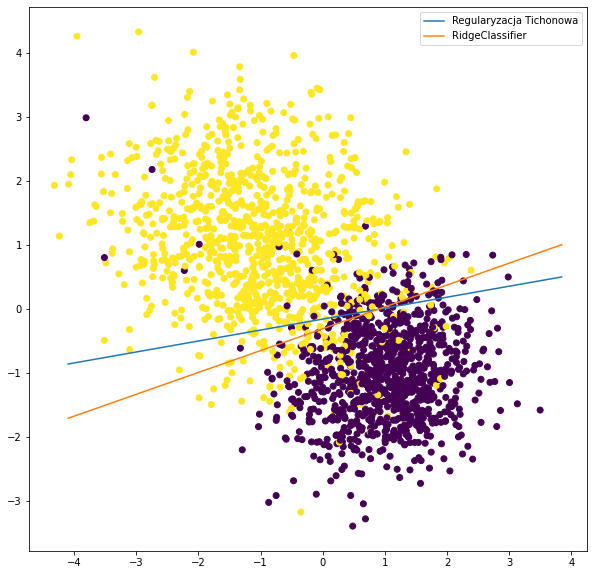

In [6]:
X_interval = np.array([min(X_test[:,0]), max(X_test[:,0])])
# X_interval = np.array([0, 1])

plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.plot(X_interval, [alpha_my*X_interval[0] + beta_my, alpha_my*X_interval[1] + beta_my], label = "Regularyzacja Tichonowa")
plt.plot(X_interval, [alpha_ridge*X_interval[0] + beta_ridge, alpha_ridge*X_interval[1] + beta_ridge], label = "RidgeClassifier")
plt.legend()
plt.show

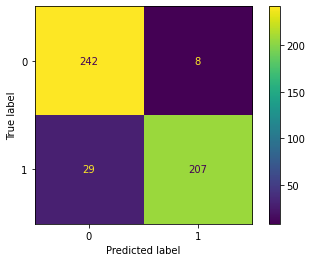

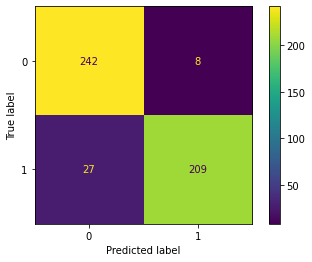

In [7]:
my_cm = metrics.confusion_matrix(Y_test, my_pred)
my_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=my_cm)
my_disp.plot()

sk_cm = metrics.confusion_matrix(Y_test, sk_pred)
sk_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=sk_cm)
sk_disp.plot()

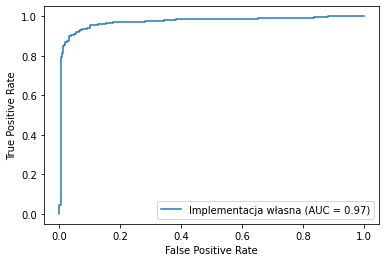

In [8]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test @ ridge)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Implementacja własna')
display.plot()

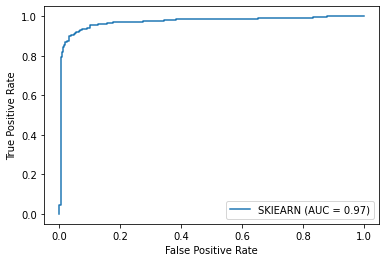

In [9]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model_ridge.decision_function(X_test))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SKlEARN')
display.plot()

In [10]:
print(f'Czas pracy dla mojej implementacji: {end_time_my}')
print(f'Czas pracy dla RidgeClassifier: {end_time_ri}')
print(f'Celność mojej implementacji: {acc_my}')
print(f'Celność mojej implementacji: {acc_sk}')
print("Specifoczność RidgeClassifier: ",sk_cm[1][1]/(sk_cm[0][0]+sk_cm[1][1]))
print("Specyficzność własnej implementacji: ",my_cm[1][1]/(my_cm[0][0]+my_cm[1][1]))

Czas pracy dla mojej implementacji: 0.00015901327133178712
Czas pracy dla RidgeClassifier: 0.0012474513053894042
Celność mojej implementacji: 0.9238683127572016
Celność mojej implementacji: 0.9279835390946503
Specifoczność RidgeClassifier:  0.4634146341463415
Specyficzność własnej implementacji:  0.4610244988864143


### Zbiór cleveland

In [11]:
column_name = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv("HeartCleveland.csv", names = column_name) 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [12]:
for column in column_name:
    print(df[df[column] == '?'].index)
    

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([166, 192, 287, 302], dtype='int64')
Int64Index([87, 266], dtype='int64')
Int64Index([], dtype='int64')


In [13]:
for column in column_name:
    df = df.drop(df.index[df[column] == '?'])
    
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [14]:
df.loc[df['num'] > 0,'num'] = 1
df.loc[df['num'] == 0, 'num'] = -1

In [15]:

column_discreet = ['trestbps', 'chol', 'thalach','oldpeak']
column_Still = ['age']
column_categorical  = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal', 'num']
df = df.apply(pd.to_numeric) 


discreet_healthy_s = pd.Series(dtype='float64')
for column in column_discreet:
    discreet_healthy = pd.Series({
        f'mean {column}': df.query("num == -1")[column].mean(),
        f'std {column}': df.query("num == -1")[column].std(),
        f'max {column}': df.query("num == -1")[column].max(),
        f'min {column}': df.query("num == -1")[column].min()})
    discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)

Still_healthy_s = pd.Series(dtype='float64')
for column in column_Still:
    mean_col = df.query("num == -1")[column].mean()
    mean_col = round(mean_col)
    
    Still_healthy = pd.Series({
        f'mean {column}': mean_col,
        f'std {column}': df.query("num == -1")[column].std(),
        f'max {column}': df.query("num == -1")[column].max(),
        f'min {column}': df.query("num == -1")[column].min()})
    Still_healthy_s = Still_healthy_s.append(Still_healthy)

categorical_healthy_s = pd.Series(dtype='float64')
for column in column_categorical:
    dom_col = df.query("num == -1")[column].mode()
    dom_col = dom_col[0]
    categorical_healthy = pd.Series({
        f'dominant {column}': dom_col})
    categorical_healthy_s = categorical_healthy_s.append(categorical_healthy)
    
healthy = pd.concat([discreet_healthy_s,Still_healthy_s,categorical_healthy_s])
healthy

C:\Users\Bartek\AppData\Local\Temp\ipykernel_6448\3383826073.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)
C:\Users\Bartek\AppData\Local\Temp\ipykernel_6448\3383826073.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)
C:\Users\Bartek\AppData\Local\Temp\ipykernel_6448\3383826073.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)
C:\Users\Bartek\AppData\Local\Temp\ipykernel_6448\3383826073.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

mean trestbps       129.175000
std trestbps         16.373990
max trestbps        180.000000
min trestbps         94.000000
mean chol           243.493750
std chol             53.757550
max chol            564.000000
min chol            126.000000
mean thalach        158.581250
std thalach          19.043304
max thalach         202.000000
min thalach          96.000000
mean oldpeak          0.598750
std oldpeak           0.787160
max oldpeak           4.200000
min oldpeak           0.000000
mean age             53.000000
std age               9.551151
max age              76.000000
min age              29.000000
dominant sex          1.000000
dominant cp           3.000000
dominant fbs          0.000000
dominant restecg      0.000000
dominant exang        0.000000
dominant slope        1.000000
dominant ca           0.000000
dominant thal         3.000000
dominant num         -1.000000
dtype: float64

In [16]:

column_discreet = ['trestbps', 'chol', 'thalach','oldpeak']
column_Still = ['age']
column_categorical  = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal', 'num']
df = df.apply(pd.to_numeric) 

discreet_healthy_s = pd.Series(dtype='float64')
for column in column_discreet:
    discreet_healthy = pd.Series({
        f'mean {column}': df.query("num == 1")[column].mean(),
        f'std {column}': df.query("num == 1")[column].std(),
        f'max {column}': df.query("num == 1")[column].max(),
        f'min {column}': df.query("num == 1")[column].min()})
    discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)

Still_healthy_s = pd.Series(dtype='float64')
for column in column_Still:
    mean_col = df.query("num == -1")[column].mean()
    mean_col = round(mean_col)
    
    Still_healthy = pd.Series({
        f'mean {column}': mean_col,
        f'std {column}': df.query("num == 1")[column].std(),
        f'max {column}': df.query("num == 1")[column].max(),
        f'min {column}': df.query("num == 1")[column].min()})
    Still_healthy_s = Still_healthy_s.append(Still_healthy)

categorical_healthy_s = pd.Series(dtype='float64')
for column in column_categorical:
    dom_col = df.query("num == 1")[column].mode()
    dom_col = dom_col[0]
    categorical_healthy = pd.Series({
        f'dominant {column}': dom_col})
    categorical_healthy_s = categorical_healthy_s.append(categorical_healthy)
    
ill = pd.concat([discreet_healthy_s,Still_healthy_s,categorical_healthy_s])


C:\Users\Bartek\AppData\Local\Temp\ipykernel_6448\1772858690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)
C:\Users\Bartek\AppData\Local\Temp\ipykernel_6448\1772858690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)
C:\Users\Bartek\AppData\Local\Temp\ipykernel_6448\1772858690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  discreet_healthy_s = discreet_healthy_s.append(discreet_healthy)
C:\Users\Bartek\AppData\Local\Temp\ipykernel_6448\1772858690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [17]:
data = pd.DataFrame({'ill':ill,'healthy':healthy})
data

,ill,healthy
mean trestbps,134.635036,129.175000
std trestbps,18.896730,16.373990
max trestbps,200.000000,180.000000
min trestbps,100.000000,94.000000
mean chol,251.854015,243.493750
std chol,49.679937,53.757550
max chol,409.000000,564.000000
min chol,131.000000,126.000000
mean thalach,139.109489,158.581250
std thalach,22.710673,19.043304


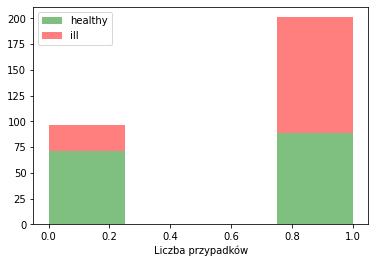

In [24]:
cla = 'sex'
_range = 4
x,y=[],[]
healthy = df.query('num == -1')[cla]
ill = df.query('num == 1')[cla]

plt.hist([healthy, ill], _range, stacked=True,color=['g','r'],alpha=0.5, label=['healthy', 'ill'])
plt.xlabel('Wartość cechy')
plt.xlabel('Liczba przypadków')
plt.legend()

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


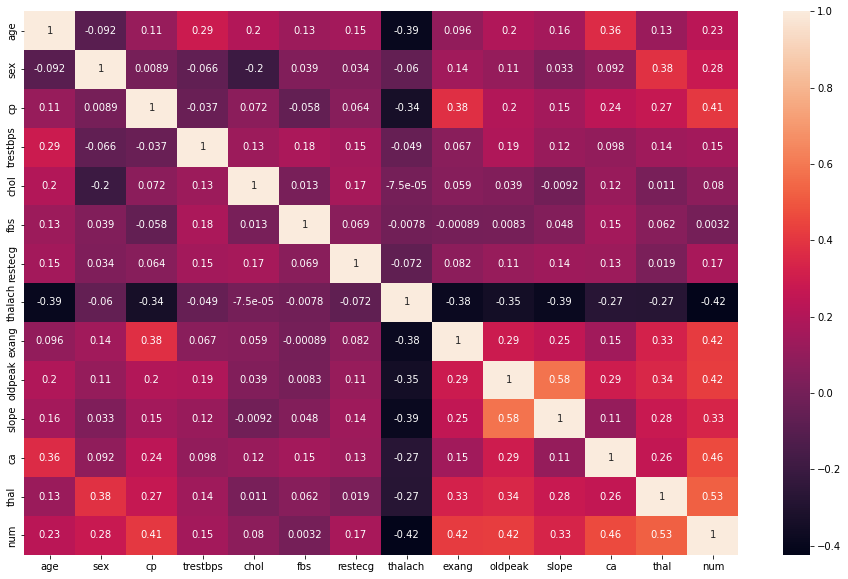

In [20]:
import seaborn as sn
plt.figure(figsize = (16,10))
sn.heatmap(df.corr(), annot=True)
plt.show()

### Wnioski
Na chorowalność największy wpływ maja thal,ca,oldpeakexang,thalach